In [98]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

In [199]:
file = "testfile_3"

nodes = dict()
edges = []
ant_paths = dict()
start_node = None
sink_node = None

with open(file, "r") as f:
    prev = None

    for line in f:
        line = line.strip()
        if line == "":
            break
        node_elems = line.split(" ")
        if len(node_elems) == 3:
            nodes[node_elems[0]] = (int(node_elems[1]), int(node_elems[2]))
            if prev == "##start":
                start_node = node_elems[0]
            elif prev == "##end":
                sink_node = node_elems[0]
        else:
            edge_elems = line.split("-")
            if len(edge_elems) == 2:
                edges.append((edge_elems[0], edge_elems[1]))
                edges.append((edge_elems[1], edge_elems[0]))
        prev = line

    for line in f:
        line = line.strip()
        moves = line.split(" ")
        for move in moves:
            move_elems = move.split("-")
            if move_elems[0] not in ant_paths.keys():
                ant_paths[move_elems[0]] = [start_node]
            ant_paths[move_elems[0]].append(move_elems[1])
    
#print(ant_paths)
paths = ant_paths.values()
#print(paths)
unique_paths = list(set(tuple(x) for x in paths))
print(unique_paths)
#print(start_node)
#print(sink_node)

[('start', '1', '5', '6', 'end'), ('start', '3', '4', '2', 'end')]


In [200]:
G = nx.Graph()
#G = nx.DiGraph()
#print(G.__doc__)

In [201]:
G.add_nodes_from(nodes.keys())
#print(G.nodes)
nx.set_node_attributes(G, nodes, 'pos')
#print(G.nodes(data=True))
G.add_edges_from(edges)
#print(G.edges)

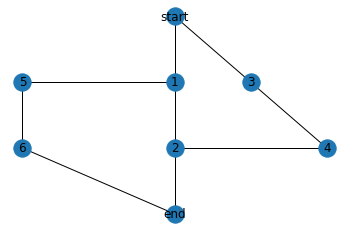

In [202]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
nx.draw(G, nodes, with_labels = True)


In [217]:
nt = Network(notebook=True)
nt.from_nx(G)

#for node in nt.nodes:
#    node['color'] = "red"
    
for path in unique_paths:
    for i in range(1, len(path)):
        for edge in nt.edges:
            #print(path[i - 1], " ", path[i])
            #print(edge["from"], " ", edge["to"])
            #print(" ")
            if (edge["from"] == path[i - 1] and edge["to"] == path[i]) \
            or (edge["to"] == path[i - 1] and edge["from"] == path[i]):
                edge["color"] = "red"
            #    print("found", edge["from"], " ", edge["to"])

#print(nt.edges[0])

for edge in nt.edges:
    print(edge)

nt.show_buttons(filter_=['physics'])
nt.show("nx.html")


{'weight': 1, 'from': '3', 'to': '4', 'color': 'red'}
{'weight': 1, 'from': '3', 'to': 'start', 'color': 'red'}
{'weight': 1, 'from': 'start', 'to': '1', 'color': 'red'}
{'weight': 1, 'from': 'end', 'to': '6', 'color': 'red'}
{'weight': 1, 'from': 'end', 'to': '2', 'color': 'red'}
{'weight': 1, 'from': '4', 'to': '2', 'color': 'red'}
{'weight': 1, 'from': '1', 'to': '5', 'color': 'red'}
{'weight': 1, 'from': '1', 'to': '2'}
{'weight': 1, 'from': '5', 'to': '6', 'color': 'red'}
